In [2]:
# so we want to measure click through rate 

# click through rate = click / total Impressions 



In [1]:
# can be a binary outcome of 0, 1 
# we can use a binomial distribution here 

import numpy as np
import pandas as pd

In [2]:
class BernoulliBandit:
    def __init__(self, p):
        self.p = p
    def display_ad(self):
        reward = np.random.binomial(n = 1, p = self.p)

        return reward

In [3]:
adA = BernoulliBandit(0.004)
adB = BernoulliBandit(0.016)
adC = BernoulliBandit(0.02)
adD = BernoulliBandit(0.028)
adE = BernoulliBandit(0.031)
ads = [adA, adB, adC, adD, adE]

In [4]:
n_test = 10000
n_prod = 90000
n_ads = len(ads)
Q = np.zeros(n_ads) # Q, action values 
N = np.zeros(n_ads) # N, total impressions
total_reward = 0 
avg_rewards = []

In [5]:
# every ad has a different probability of click-through rate, and we select an ad to be viewed at random 
for i in range(n_test):
    ad_chosen = np.random.randint(n_ads)
    R = ads[ad_chosen].display_ad() # observe reward 
    N[ad_chosen] += 1 
    Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
    total_reward += R 
    avg_reward_so_far = total_reward / (i + 1)
    avg_rewards.append(avg_reward_so_far)

In [6]:
best_ad_index = np.argmax(Q)

In [7]:
print("The best performing ad is {}".format(best_ad_index))

The best performing ad is 4


In [8]:
# not exactly right, maybe the test period wasnt long enough 

In [9]:
# running in production

ad_chosen = best_ad_index 
for i in range(n_prod):
    R = ads[ad_chosen].display_ad()
    total_reward += R 
    avg_reward_so_far = total_reward / (n_test + i + 1)
    avg_rewards.append(avg_reward_so_far)

In [10]:
# creating a pandas dataFrame to record the results from the A/B/n test 
df_reward_comparison = pd.DataFrame(avg_rewards, columns = ["A/B/n"])

In [11]:
import matplotlib.pyplot as plt

In [12]:
df_reward_comparison["Impressions"] = [i for i in range(1, len(df_reward_comparison) + 1)]

In [13]:
df_reward_comparison

,A/B/n,Impressions
0,0.000000,1
1,0.000000,2
2,0.000000,3
3,0.000000,4
4,0.000000,5
...,...,...
99995,0.030471,99996
99996,0.030471,99997
99997,0.030471,99998
99998,0.030470,99999


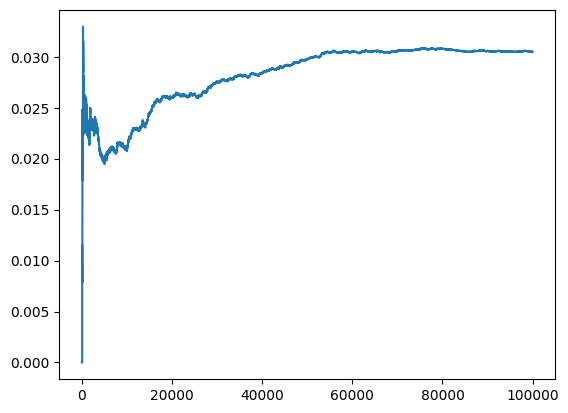

In [14]:


plt.plot(df_reward_comparison["Impressions"], df_reward_comparison["A/B/n"])

In [19]:
# A/B/n testing is inefficient as it does not modift the experiment dynamically by learning from observations 

In [20]:
# it is unable to correct a decision once it is made 

In [21]:
# It is unable to adapt to the changes (if the reward changes over time)

In [22]:
# the length of a test period is another hyperparameter to test, affecting efficiency

In [23]:
#A/B/n testing is simple 

In [24]:
# E - greedy actions 

In [25]:
eps = 0.1 
n_prod = 100000
n_ads = len(ads)
Q = np.zeros(n_ads)
N = np.zeros(n_ads)
total_reward = 0 
avg_rewards = []

In [26]:
ad_chosen = np.random.randint(n_ads)
for i in range(n_prod):
    R = ads[ad_chosen].display_ad()
    N[ad_chosen] += 1 
    Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
    total_reward += R 
    avg_reward_so_far = total_reward / ( i + 1)
    avg_rewards.append(avg_reward_so_far)
    # select the next ad to display 
    
    if np.random.uniform() <= eps:
        ad_chosen = np.random.randint(n_ads)
    else:
        ad_chosen = np.argmax(Q)
# plot graphs based on different greed values 
        

In [27]:
# e - greedy has the potential to pick upo changes 

In [28]:
# maybe can dynamically change the e value, starting from high -> low 

In [29]:
# maybe we we could increase the weight of the more recent values 

In [30]:
# this will introduce new hyperparameters to be tuned 

In [31]:
# upper confidence limit 
# basically at every interval, choose the one with the highest score 
# score = uncertainty + action value 
# uncertainty = c sqrt(lnt / N(a))



In [33]:
c = 0.1 
n_prod = 100000
n_ads = len(ads)
ad_indices = np.array(range(n_ads))
print(ad_indices)
Q = np.zeros(n_ads) # the action values 
N = np.zeros(n_ads) # the number of impressions 
total_reward = 0 
avg_rewards = []

[0 1 2 3 4]


In [34]:
ad_indices[N==0]

array([0, 1, 2, 3, 4])

In [35]:
for t in range(1, n_prod + 1):
    if any(N == 0):
        ad_chosen = np.random.choice(ad_indices[N==0])
    else:
        uncertainty = np.sqrt(np.log(t)/N)
        ad_chosen = np.argmax(Q + c * uncertainty)
    R = ads[ad_chosen].display_ad()
    N[ad_chosen] += 1 
    Q[ad_chosen] += (1/N[ad_chosen]) * (R - Q[ad_chosen])
    total_reward += R 
    avg_reward_so_far = total_reward / t 
    avg_rewards.append(avg_reward_so_far)
    
df_reward_comparison["UCB, c = {}".format(c)] = avg_rewards

In [ ]:
# run through different c values since it is a hyperparameter 

# UCB is a set and forget approach and can be optimized dynamically . or hard to tune 